# Analysis of the velocity gradients 

In [1]:
import numpy as np
import os
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from matplotlib import cm
from astropy.coordinates import SkyCoord
from scipy import stats
from scipy.integrate import simpson

%matplotlib widget

## Comparison between the velocity gradients in NGC 1333 SE

We have both the intensity of the lines and the angle of the lines. First lets just check the correlation in the directions.

Based on the definition of the dot product, to find the cosine of the angle, we can do:

\begin{equation}
\cos (\theta) = \frac{\vec{a} \cdot \vec{b}}{\|a\| \|b\|}
\end{equation}

In [2]:
def dot_product(ax, ay, bx, by):
    '''
    Returns the dot product between two vectors (ax, ay) and (bx, by).
    '''
    return ax * bx + ay * by

def cosine_angle(ax, ay, bx, by):
    '''
    Calculates the angle between two vectors (ax, ay) and (bx, by)
    Will always return between 0 and pi
    '''
    dot_p = dot_product(ax, ay, bx, by)
    absol = (np.sqrt(ax**2 + ay**2) * np.sqrt(bx**2 + by**2))
    return np.arccos(dot_p / absol)

def absolute_angle(ax, ay):
    '''
    Gives the angle with respect to the x axis, with the origin to the west and increasing counterclockwise
    '''
    unit_x_arrayx = np.ones(np.shape(ax))
    unit_x_arrayy = np.zeros(np.shape(ax))
    return cosine_angle(ax, ay, unit_x_arrayx, unit_x_arrayy) * np.sign(ay)

In [3]:
# original files with the amp, vel, and sigma
clusters_red_HC3N_file = '../clustering/clusters_red_HC3N_reproject.fits'
clusters_blue_HC3N_file = '../clustering/clusters_blue_HC3N_reproject.fits'
clusters_red_N2Hp_file = '../clustering/clusters_red_N2Hp.fits'
clusters_blue_N2Hp_file = '../clustering/clusters_blue_N2Hp.fits'

# files with the velocity gradients
grad_red_HC3N_filebase =  'gradients/vel_grad_{0}_HC3N_red_reproject.fits'
grad_blue_HC3N_filebase =  'gradients/vel_grad_{0}_HC3N_blue_reproject.fits'
grad_red_N2Hp_filebase =  'gradients/vel_grad_{0}_N2Hp_red.fits'
grad_blue_N2Hp_filebase =  'gradients/vel_grad_{0}_N2Hp_blue.fits'

# names of the files we want to save
dot_product_red_file = 'dot_product_red.fits'
dot_product_blue_file = 'dot_product_blue.fits'

In [4]:
grad_x_red_HC3N, grad_HC3N_header = fits.getdata(grad_red_HC3N_filebase.format('x'), header=True)
grad_y_red_HC3N = fits.getdata(grad_red_HC3N_filebase.format('y'))
grad_x_red_N2Hp, grad_N2Hp_header = fits.getdata(grad_red_N2Hp_filebase.format('x'), header=True)
grad_y_red_N2Hp = fits.getdata(grad_red_N2Hp_filebase.format('y'))

grad_x_blue_HC3N = fits.getdata(grad_blue_HC3N_filebase.format('x'))
grad_y_blue_HC3N = fits.getdata(grad_blue_HC3N_filebase.format('y'))
grad_x_blue_N2Hp = fits.getdata(grad_blue_N2Hp_filebase.format('x'))
grad_y_blue_N2Hp = fits.getdata(grad_blue_N2Hp_filebase.format('y'))

wcs_maps = WCS(grad_N2Hp_header).celestial

To visualize the distribution of angles, we need to calculate the angle of each fiber in each tracer. We do not need this for the dot product, but it will give us an idea of the distribution before comparing everything.

In [5]:
# unit_x_arrayx = np.ones(np.shape(grad_x_red_HC3N))
# unit_x_arrayy = np.zeros(np.shape(grad_x_red_HC3N)) 
angle_red_HC3N = absolute_angle(grad_x_red_HC3N, grad_y_red_HC3N) # angle in radians
angle_blue_HC3N = absolute_angle(grad_x_blue_HC3N, grad_y_blue_HC3N)
angle_red_N2Hp = absolute_angle(grad_x_red_N2Hp, grad_y_red_N2Hp) # angle in radians
angle_blue_N2Hp = absolute_angle(grad_x_blue_N2Hp, grad_y_blue_N2Hp) 

In [6]:
# def get_kernel_normalized(data, xmin, xmax, xnum=100):
#     data_kde = np.linspace(xmin, xmax, xnum)
#     kernel = stats.gaussian_kde(data)
#     dens = kernel(data_kde)
#     dens /= simpson(dens, data_kde) # normalizing of probability
#     return data_kde, dens

In [7]:
# data_kde_red_HC3N, dens_red_HC3N = get_kernel_normalized(angle_red_HC3N[np.where(~np.isnan(angle_red_HC3N))], -np.pi, np.pi, xnum=99)
# the 0 point is shifted! start from -pi

Text(1.0, 1.0, 'Blueshifted fiber')

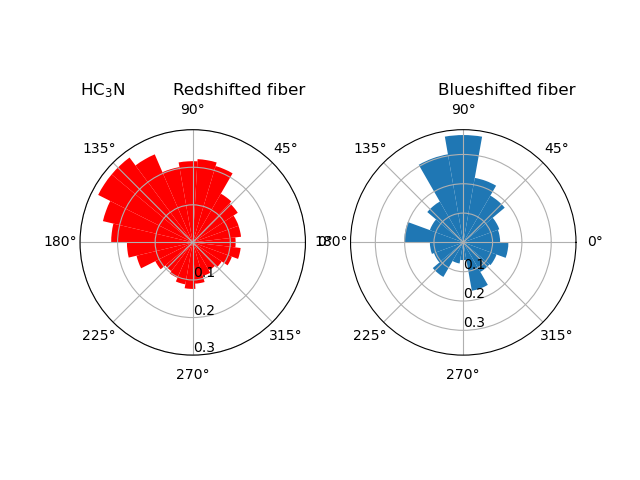

In [8]:
fig = plt.figure()

ax = fig.add_subplot(121, projection='polar')
ax.hist(angle_red_HC3N[np.where(~np.isnan(angle_red_HC3N))], bins='fd', density=True, color='r')
ax2 = fig.add_subplot(122, projection='polar')
ax2.hist(angle_blue_HC3N[np.where(~np.isnan(angle_blue_HC3N))], bins='fd',density=True)

ax.set_rlabel_position(270)
ax.set_rticks([0.1, 0.2, 0.3])
ax2.set_rlabel_position(270)
ax2.set_rticks([0.1, 0.2, 0.3])

ax.set_title(r'HC$_3$N', loc='left')
ax.set_title('Redshifted fiber', loc='right')
ax2.set_title('Blueshifted fiber', loc='right')

We need to check statistically if the vectors could come from a random distribution but for now, we see that in HC3N, the redshifted fiber has a peak at about 135 degrees and a second one at 90, but has an underlying uniform distribution along all angles. The blueshifted fiber has a clear tendency toward 90 deg and an underlying random distribution.

Text(1.0, 1.0, 'Blueshifted fiber')

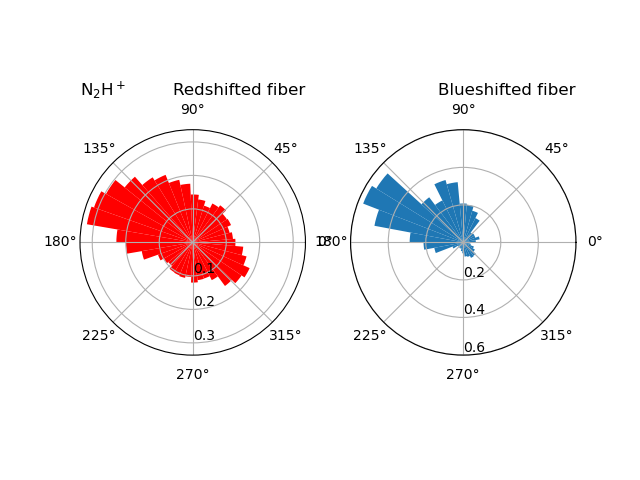

In [9]:
fig = plt.figure()

ax = fig.add_subplot(121, projection='polar')
ax.hist(angle_red_N2Hp[np.where(~np.isnan(angle_red_N2Hp))], bins='fd', density=True, color='r')
ax2 = fig.add_subplot(122, projection='polar')
ax2.hist(angle_blue_N2Hp[np.where(~np.isnan(angle_blue_N2Hp))], bins='fd',density=True)

ax.set_rlabel_position(270)
ax.set_rticks([0.1, 0.2, 0.3])
ax2.set_rlabel_position(270)
ax2.set_rticks([0.2, 0.4, 0.6])

ax.set_title(r'N$_2$H$^+$', loc='left')
ax.set_title('Redshifted fiber', loc='right')
ax2.set_title('Blueshifted fiber', loc='right')

The redshifted fiber in N2Hp seems to follow a roughly bimodal distribution, with many vectors between 140 and 170 degrees and another second peak between -45 and -20 degrees. The blueshifted fiber has the same first peak, but its second peak is between 90 and 135 degrees.

In [10]:
# here we calculate the dot product just to see it

norm_red_HC3N = np.sqrt(grad_x_red_HC3N**2 + grad_y_red_HC3N**2)
norm_blue_HC3N = np.sqrt(grad_x_blue_HC3N**2 + grad_y_blue_HC3N**2)
norm_red_N2Hp = np.sqrt(grad_x_red_N2Hp**2 + grad_y_red_N2Hp**2)
norm_blue_N2Hp = np.sqrt(grad_x_blue_N2Hp**2 + grad_y_blue_N2Hp**2)
dot_product_total_red = dot_product(grad_x_red_HC3N, grad_y_red_HC3N, grad_x_red_N2Hp, grad_y_red_N2Hp)
dot_product_normalized_red = dot_product_total_red / (norm_red_HC3N * norm_red_N2Hp)
dot_product_total_blue = dot_product(grad_x_blue_HC3N, grad_y_blue_HC3N, grad_x_blue_N2Hp, grad_y_blue_N2Hp)
dot_product_normalized_blue = dot_product_total_blue / (norm_blue_HC3N * norm_blue_N2Hp)

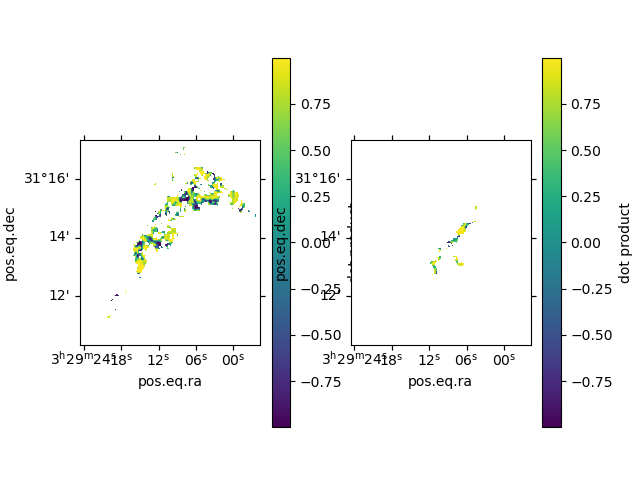

In [11]:
fig = plt.figure()
ax = fig.add_subplot(121, projection=wcs_maps)
im = ax.imshow(dot_product_normalized_red, origin='lower')
fig.colorbar(im, ax=ax, label='dot product')
ax2 = fig.add_subplot(122, projection=wcs_maps)
im2 = ax2.imshow(dot_product_normalized_blue, origin='lower')
fig.colorbar(im2, ax=ax2, label='dot product')

We see that we have values from -1 to 1, as expected.

With this, we have $\cos(\theta)$, if we want $\theta$, we need to do the inverse cosine

In [12]:
comparison_angle_red = cosine_angle(grad_x_red_HC3N, grad_y_red_HC3N, grad_x_red_N2Hp, grad_y_red_N2Hp)
comparison_angle_blue = cosine_angle(grad_x_blue_HC3N, grad_y_blue_HC3N, grad_x_blue_N2Hp, grad_y_blue_N2Hp)

comparison_angle_red_list = comparison_angle_red[np.where(~np.isnan(comparison_angle_red))]
comparison_angle_blue_list = comparison_angle_blue[np.where(~np.isnan(comparison_angle_blue))]


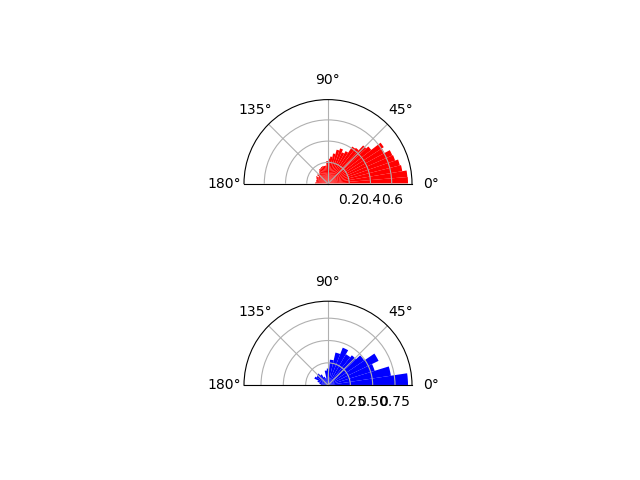

In [13]:
fig = plt.figure()
ax = fig.add_subplot(211, projection='polar')
ax.hist(comparison_angle_red_list, color='r', bins='fd', density=True)
ax.set_thetamin(0)
ax.set_thetamax(180)
ax.set_rticks([0.2, 0.4, 0.6])

ax2 = fig.add_subplot(212, projection='polar')
ax2.hist(comparison_angle_blue_list, color='b', bins='fd', density=True)
ax2.set_thetamin(0)
ax2.set_thetamax(180)
ax2.set_rticks([0.25, 0.5, 0.75])


In [14]:
# data_kde = np.linspace(0, np.pi, 100)
# kernel = stats.gaussian_kde(angle_values)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='polar')
# ax.hist(angle_values)
# ax.set_thetamin(0)
# ax.set_thetamax(180)

## Analysis plots?

In [15]:
import pandas as pd
from matplotlib import cm

In [16]:
# we load the protostar catalog

sourcecat = '../data/my_catalog_vel.csv'
catalog_protostars = pd.read_csv(sourcecat)

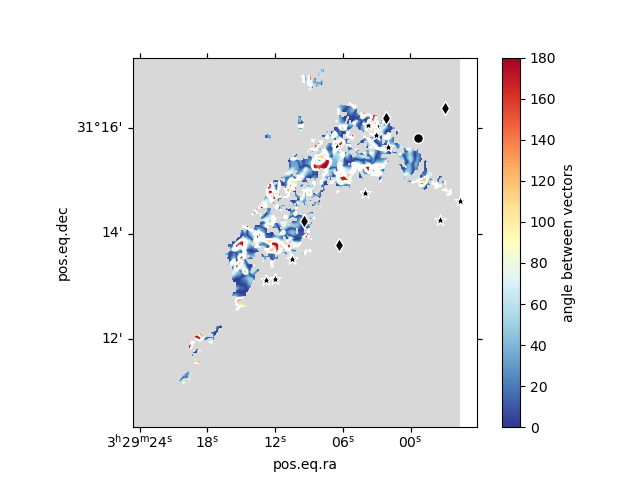

In [17]:
# we want to see if the regions where the difference in angle is larger than pi/2 have any relevance
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs_maps)
cmap = cm.get_cmap('RdYlBu_r')
cmap.set_bad('0.85')
im = ax.imshow(comparison_angle_red * 180/np.pi, origin='lower', cmap=cmap, vmin=0, vmax=180)
ax.contour(comparison_angle_red * 180/np.pi, levels=[90, 135], colors='w')
fig.colorbar(im, ax=ax, label='angle between vectors')


for i in catalog_protostars.index.values:
    if catalog_protostars.loc[i, 'Class'] == 'I' or catalog_protostars.loc[i, 'Class'] == '0' or catalog_protostars.loc[i, 'Class'] == '0/I':
        class0dot = ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
                   transform=ax.get_transform('world'), marker='*', facecolor='k', edgecolor='w', s=70)
    elif catalog_protostars.loc[i, 'Class'] == 'II' or catalog_protostars.loc[i, 'Class'] == 'III':
        classIIdot = ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
                   transform=ax.get_transform('world'), marker='d', facecolor='k', edgecolor='w', s=50)
    elif catalog_protostars.loc[i, 'Class'] == 'Flat':
        classflatdot = ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
                   transform=ax.get_transform('world'), marker='o', facecolor='k', edgecolor='w', s=50)
    else: continue
    


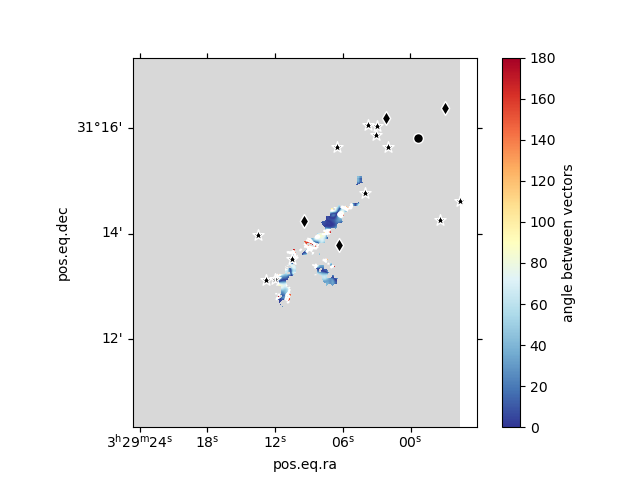

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs_maps)
cmap = cm.get_cmap('RdYlBu_r')
cmap.set_bad('0.85')
im = ax.imshow(comparison_angle_blue * 180/np.pi, origin='lower', cmap=cmap, vmin=0, vmax=180)
ax.contour(comparison_angle_blue * 180/np.pi, levels=[90, 135], colors='w')
fig.colorbar(im, ax=ax, label='angle between vectors')


for i in catalog_protostars.index.values:
    if catalog_protostars.loc[i, 'Class'] == 'I' or catalog_protostars.loc[i, 'Class'] == '0' or catalog_protostars.loc[i, 'Class'] == '0/I':
        class0dot = ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
                   transform=ax.get_transform('world'), marker='*', facecolor='k', edgecolor='w', s=70)
    elif catalog_protostars.loc[i, 'Class'] == 'II' or catalog_protostars.loc[i, 'Class'] == 'III':
        classIIdot = ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
                   transform=ax.get_transform('world'), marker='d', facecolor='k', edgecolor='w', s=50)
    elif catalog_protostars.loc[i, 'Class'] == 'Flat':
        classflatdot = ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
                   transform=ax.get_transform('world'), marker='o', facecolor='k', edgecolor='w', s=50)
    else: continue
    


## Comparison of angles with respect to fiber direction

We need to compare the gradients with respect to the fiber direction to see how perpendicular or parallel they are. 

In [19]:
from astropy.constants import k_B, m_p
from astropy.constants import u as amu

In [29]:
clusters_red_HC3N = fits.getdata(clusters_red_HC3N_file)
clusters_blue_HC3N = fits.getdata(clusters_blue_HC3N_file)

clusters_red_N2Hp, header_clusters_N2Hp = fits.getdata(clusters_red_N2Hp_file, header=True)
clusters_blue_N2Hp = fits.getdata(clusters_blue_N2Hp_file)

header3dN2Hp = fits.getheader('../data/NGC1333-N2Hp_match_kms_F1F_01_12_small.fits')

In [21]:
# we will analyze N2Hp for fiber definition

mu_N2Hp = 29.022 # molecular weight of N2Hp
T_K = 12.4 * u.K  
delta_chan = np.abs(header3dN2Hp['cdelt3']) 

sigma_thermal = np.sqrt(k_B * T_K / (mu_N2Hp * amu)).to(u.km/u.s)

sigma_deconvolved_red_N2Hp = np.sqrt(clusters_red_N2Hp[2]**2 - delta_chan**2 /2.355)
sigma_deconvolved_blue_N2Hp = np.sqrt(clusters_blue_N2Hp[2]**2 - delta_chan**2 /2.355)
sigma_nt_red_N2Hp = np.sqrt(sigma_deconvolved_red_N2Hp**2 - sigma_thermal.value**2)
sigma_nt_blue_N2Hp = np.sqrt(sigma_deconvolved_blue_N2Hp**2 - sigma_thermal.value**2)

/tmp/ipykernel_5392/2858467231.py:9: RuntimeWarning: invalid value encountered in sqrt
  sigma_deconvolved_red_N2Hp = np.sqrt(clusters_red_N2Hp[2]**2 - delta_chan**2 /2.355)
/tmp/ipykernel_5392/2858467231.py:10: RuntimeWarning: invalid value encountered in sqrt
  sigma_deconvolved_blue_N2Hp = np.sqrt(clusters_blue_N2Hp[2]**2 - delta_chan**2 /2.355)
/tmp/ipykernel_5392/2858467231.py:11: RuntimeWarning: invalid value encountered in sqrt
  sigma_nt_red_N2Hp = np.sqrt(sigma_deconvolved_red_N2Hp**2 - sigma_thermal.value**2)
/tmp/ipykernel_5392/2858467231.py:12: RuntimeWarning: invalid value encountered in sqrt
  sigma_nt_blue_N2Hp = np.sqrt(sigma_deconvolved_blue_N2Hp**2 - sigma_thermal.value**2)


In [22]:
mu_H2 = 2.37
c_s = np.sqrt(k_B * T_K / (mu_H2 * amu)).to(u.km/u.s)

(array([0.10386562, 0.25100859, 0.59722732, 0.71840388, 1.24638746,
        1.58395073, 2.5533632 , 3.03806943, 3.81706159, 4.57008735,
        5.31445764, 6.70798806, 6.45697947, 6.53487869, 5.72992012,
        5.78185293, 5.09807093, 4.81244047, 3.6785741 , 4.29311236,
        3.60933035, 3.09000224, 3.01210303, 2.57067413, 1.93882494,
        1.93016947, 1.65319448, 1.71378276, 1.81764838, 1.40218589,
        1.21176558, 1.20311012, 1.01268981, 0.74437029, 0.67512654,
        0.69243748, 0.73571482, 0.61453826, 0.52798358, 0.67512654,
        0.53663904, 0.47605077, 0.51067264, 0.50201717, 0.50201717,
        0.25966405, 0.19042031, 0.18176484, 0.20773124, 0.20773124,
        0.12117656, 0.1644539 , 0.27697499, 0.12983203, 0.22504218,
        0.20773124, 0.21638671, 0.19042031, 0.25100859, 0.17310937,
        0.20773124, 0.17310937, 0.11252109, 0.1644539 , 0.1384875 ,
        0.09521015, 0.04327734, 0.07789922, 0.06924375, 0.05193281,
        0.03462187, 0.06924375, 0.02596641, 0.06

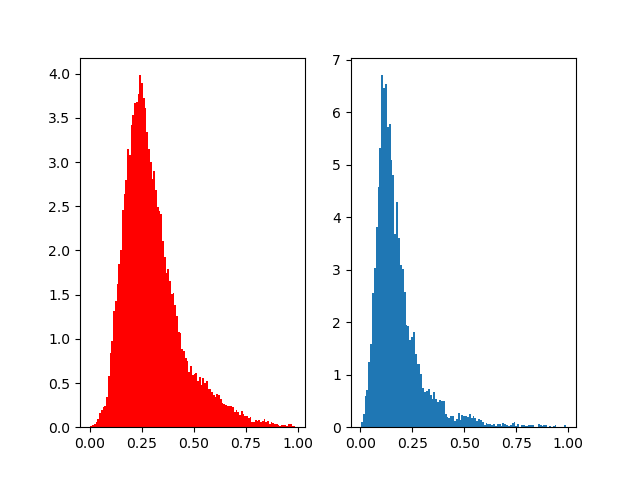

In [23]:
fig = plt.figure()

ax = fig.add_subplot(121)
ax.hist(sigma_nt_red_N2Hp[np.where(~np.isnan(sigma_nt_red_N2Hp))], bins='fd', density=True, color='r')
ax2 = fig.add_subplot(122)
ax2.hist(sigma_nt_blue_N2Hp[np.where(~np.isnan(sigma_nt_blue_N2Hp))], bins='fd',density=True)


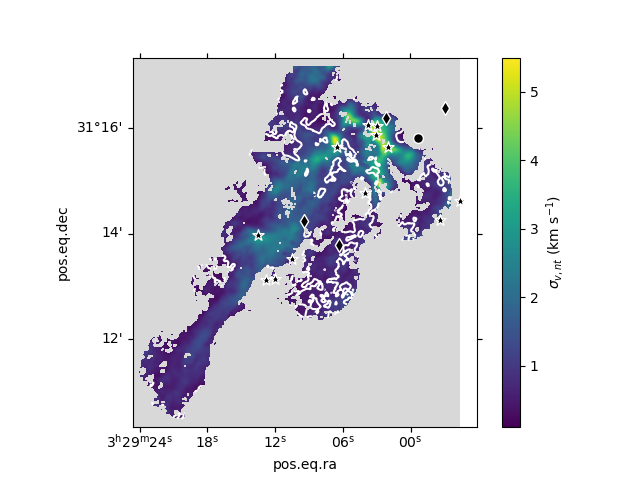

In [24]:
# select and then eliminate islands using scikit image

fig = plt.figure()
ax = fig.add_subplot(111, projection=wcs_maps)
cmap = cm.get_cmap('viridis')
cmap.set_bad('0.85')
im = ax.imshow(clusters_red_N2Hp[0], origin='lower', cmap=cmap)
ax.contour(sigma_nt_red_N2Hp, levels=[2*c_s.value], colors='w')
fig.colorbar(im, ax=ax, label='$\sigma_{v, nt}$ (km s$^{-1}$)')


for i in catalog_protostars.index.values:
    if catalog_protostars.loc[i, 'Class'] == 'I' or catalog_protostars.loc[i, 'Class'] == '0' or catalog_protostars.loc[i, 'Class'] == '0/I':
        class0dot = ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
                   transform=ax.get_transform('world'), marker='*', facecolor='k', edgecolor='w', s=70)
    elif catalog_protostars.loc[i, 'Class'] == 'II' or catalog_protostars.loc[i, 'Class'] == 'III':
        classIIdot = ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
                   transform=ax.get_transform('world'), marker='d', facecolor='k', edgecolor='w', s=50)
    elif catalog_protostars.loc[i, 'Class'] == 'Flat':
        classflatdot = ax.scatter(catalog_protostars.loc[i, 'RAJ2000'], catalog_protostars.loc[i, 'DEJ2000'], 
                   transform=ax.get_transform('world'), marker='o', facecolor='k', edgecolor='w', s=50)
    else: continue
    

In [43]:
# we remove the supersonic points
int_red_N2Hp = clusters_red_N2Hp[0].copy()
int_red_N2Hp[np.where(sigma_nt_red_N2Hp>2*c_s.value)] = 0
int_red_N2Hp[np.where(np.isnan(int_red_N2Hp))] = 0

# now we try applying filfinder to that

In [32]:
from fil_finder import FilFinder2D

In [44]:
fil = FilFinder2D(int_red_N2Hp)

/home/mvaldivi/miniconda3/lib/python3.8/site-packages/fil_finder/filfinder2D.py:142: UserWarning: No beam width given. Using 0 pixels.
  warnings.warn("No beam width given. Using 0 pixels.")


In [45]:
fil.preprocess_image(flatten_percent=95)

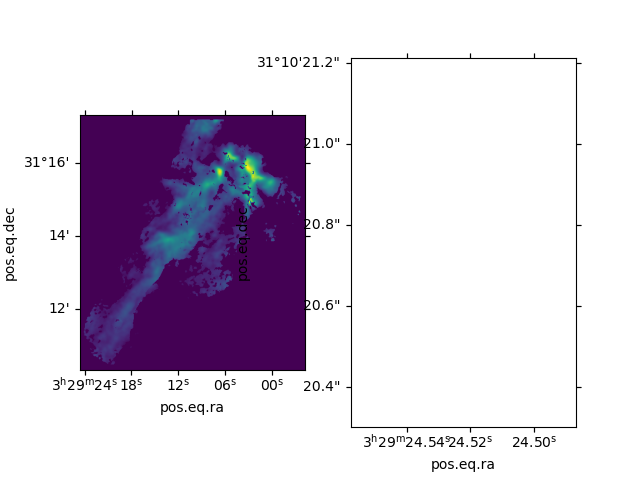

In [46]:
fig = plt.figure()
ax = fig.add_subplot(121, projection=wcs_maps)
cmap = cm.get_cmap('viridis')
cmap.set_bad('0.85')
im = ax.imshow(fil.image.value, origin='lower', cmap=cmap)
ax = fig.add_subplot(122, projection=wcs_maps)
im2 = ax2.imshow(fil.flat_img.value, origin='lower', cmap=cmap)